# PM2.5预测问题

## 1.1 数据预处理

参考：

[pandas read_csv编码详解](https://www.cnblogs.com/stephen2016/p/6113204.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = r'D:\JWE\Files\Courses\数据挖掘\work\第二章\CH2_data\CH2_data'
file_train = 'train.csv'
file_test = 'test.csv'

train = pd.read_csv(path + '\\' + file_train,encoding='big5')
test = pd.read_csv(path + '\\' + file_test,encoding='big5',names=['time_id','測項','0','1','2','3','4','5','6','7','8'])

In [3]:
train.head(20)
train.info()
train.describe()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      4320 non-null   object
 1   測站      4320 non-null   object
 2   測項      4320 non-null   object
 3   0       4320 non-null   object
 4   1       4320 non-null   object
 5   2       4320 non-null   object
 6   3       4320 non-null   object
 7   4       4320 non-null   object
 8   5       4320 non-null   object
 9   6       4320 non-null   object
 10  7       4320 non-null   object
 11  8       4320 non-null   object
 12  9       4320 non-null   object
 13  10      4320 non-null   object
 14  11      4320 non-null   object
 15  12      4320 non-null   object
 16  13      4320 non-null   object
 17  14      4320 non-null   object
 18  15      4320 non-null   object
 19  16      4320 non-null   object
 20  17      4320 non-null   object
 21  18      4320 non-null   object
 22  19      4320 non-null   

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
count,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320,...,4320,4320,4320,4320,4320,4320,4320,4320,4320,4320
unique,240,1,18,369,361,351,355,353,342,356,...,423,411,409,423,405,374,366,374,382,370
top,2014/2/6,豐原,PM2.5,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,18,4320,240,221,225,229,226,229,230,226,...,220,219,221,221,222,223,225,224,226,224


In [4]:
train.測站.value_counts()
train.測項.value_counts()

豐原    4320
Name: 測站, dtype: int64

PM2.5         240
O3            240
WIND_SPEED    240
THC           240
NO2           240
RAINFALL      240
WD_HR         240
WS_HR         240
CO            240
NO            240
PM10          240
SO2           240
AMB_TEMP      240
NMHC          240
NOx           240
WIND_DIREC    240
RH            240
CH4           240
Name: 測項, dtype: int64

原数据无缺失值，測項的CO项存在非数值项，可考虑化为0或-1，数据清洗基本完成。

df对象包含日期，观测地点，观测项目，观测时间等数据，可以看出观测时间基本是连续的，但train和test的数据是切割过的，train为一个月的前20天，test为一个月的后10天。

## 1.2 自回归序列

假设model为9阶自回归模型，$X_t = \beta_{0} + \sum_{i=1}^{9} \beta_{i} X_{t-i} + \epsilon$

In [5]:
data = train.loc[train['測項']=='PM2.5',[str(i) for i in range(0,24)]].values
data.shape
len(data.flatten())

(240, 24)

5760

In [6]:
data_test = test.loc[test['測項']=='PM2.5',[str(i) for i in range(0,9)]].values
data_test.shape
len(data_test.flatten())

(240, 9)

2160

In [7]:
data0 = np.array([[data.reshape(12,480)[j][i:i+10].tolist() for i in range(471)] for j in range(12)]).reshape(12*471,10)

In [8]:
X_train = data0[:,0:9].astype(int)
Y_train = data0[:,9].reshape(5652,1).astype(int)

X_test = data_test.astype(int)

X_train.shape
Y_train.shape
X_test.shape

(5652, 9)

(5652, 1)

(240, 9)

取train的PM2.5在每一个时间点的观测值，共240x24=5760个，其中大部分是连续的，均分为12组，每组20x24=480个样本都是连续时间观测的。

如果直接按每10个连续观测值为一个样本（前9个x，第10个y），共5760-10+1=5751个样本，但是由于每个月缺失10x24的数据，所以实际上只有(20x24-10+1)x12=5652个样本。

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 432x288 with 0 Axes>

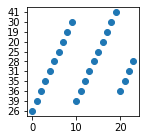

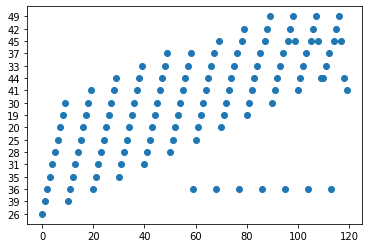

In [9]:
plt.figure(figsize=(2,2))

plt.figure(1)
ts1 = data0.flatten()[0:1*24]
plt.scatter(range(len(ts1)),ts1)

plt.figure(2)
ts2 = data0.flatten()[0:5*24]
plt.scatter(range(len(ts2)),ts2)

分别绘制前1日和前5日的时间序列图，发现一天之中的PM2.5值是有周期性规律的，而每一天的PM2.5值是在增长的。

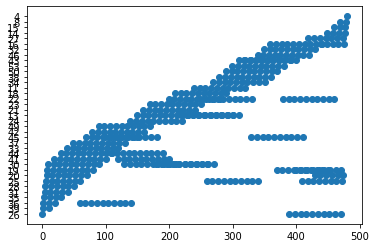

In [10]:
ts = data0.flatten()[0:20*24]
plt.scatter(range(len(ts)),ts)

画出所有的观测值散点图后，更加明显的发现数据是有周期性和季节性特点的。但是我不会做趋势项周期项分解，暂时当AR模型硬解。

## 1.3 梯度下降法求解模型参数

推导梯度下降的公式。

待求模型
$$
Y = X \beta + \epsilon
$$

其中$X$为5652x9的矩阵，$\beta$为9x1的系数向量，$Y$是5652x1的向量。

$$
\beta_{best} 
= argmin (Y - X \beta)^T( Y - X \beta)
$$

记损失函数$E_{\beta} = (Y - X \beta)^T( Y - X \beta)$，求导得
$$
\frac{\partial E_{\beta}}{\partial \beta}
= 2 X^T (X \beta - Y)
$$

其中，求导计算过程
$$
E_{\beta} = (Y - X \beta)^T( Y - X \beta) = (Y^T Y - Y^T X \beta - \beta^T X^T Y + \beta^T X^T X \beta )
$$

分别求偏导

$$
\frac{\partial Y^T Y}{\partial \beta} = 0
$$

$$
\frac{\partial Y^T X \beta}{\partial \beta} = (Y^T X)^T = X^T Y
$$

因为标量的转置等于本身，故

$$
\frac{\partial \beta^T X^T Y}{\partial \beta} 
= \frac{\partial (\beta^T X^T Y)^T}{\partial \beta}
= \frac{\partial Y^T X \beta}{\partial \beta}
= (Y^T X)^T
= X^T Y
$$

$$
\frac{\partial \beta^T X^T X \beta}{\partial \beta} = 2 X^T X \beta
$$

整理即得导数式。

In [11]:
grad_L = lambda x,beta,y:2 * np.dot(x.T,(np.dot(x,beta) - y))

R_squre = lambda Y,Y_hat:1 - np.sum((Y - Y_hat)**(2))/np.sum((Y - np.mean(Y))**(2))

loss = lambda x,beta,y:np.sum((y - np.dot(x,beta))**2)/len(y)

def gradient_descent(x,y,beta_cur=np.array([[0,0,0,0,0,0,0,0,0,1]]).T,alpha=10**(-3),precision=10**(-4),max_iters=10**(4)):
    for i in range(max_iters):
        grad_cur = grad_L(x=x,y=y,beta=beta_cur)
        if np.abs(grad_cur).all() < precision:
            break
        beta_cur = beta_cur - alpha * grad_cur
    return beta_cur

In [12]:
ts_max = data.flatten().astype(int).max()
X = np.c_[X_train,np.ones(len(X_train)).astype(int)]
Y = Y_train

In [13]:
# 正规方程组法
beta_mhat = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
Y_mhat = np.dot(X,beta_mhat)

In [14]:
# 梯度下降法
beta_hat = gradient_descent(X/ts_max,Y/ts_max,alpha=10**(-6),max_iters=10**5)
Y_hat = np.dot(X,beta_hat)

In [15]:
# 计算决定系数，衡量训练集上的水平
R_squre(Y,Y_hat) # 梯度下降
R_squre(Y,Y_mhat) # 正规方程

0.8571090776641198

0.8641624316078119

In [16]:
# 预测并输出
test_predict = np.dot(np.c_[X_test,np.ones(len(X_test)).astype(int)],beta_hat)
AR9_output = pd.DataFrame({'id':[f'id{i}' for i in range(len(test_predict))],'value':test_predict.reshape(240,).astype(int).tolist()})
AR9_output.to_csv(r'D:\JWE\Files\Courses\数据挖掘\work\第二章\AR9_output.csv',index=False)

## 1.4 改进梯度下降法

Adagrad

In [17]:
def Adagrad(x,y,beta_cur=np.array([[0,0,0,0,0,0,0,0,0,1]]).T,eta=10**(-3),precision=10**(-4),max_iters=10**(4)):
    grad_total = 0.0
    for i in range(max_iters):
        grad_cur = grad_L(x=x,y=y,beta=beta_cur)
        if np.abs(grad_cur).all() < precision:
            break
        grad_total += grad_cur**2
#         print(grad_total)
        beta_cur = beta_cur - (eta / np.sqrt(grad_total))* grad_cur
        print(loss(x,beta_cur,y))
    return beta_cur

In [18]:
beta_ahat = Adagrad(X/ts_max,Y/ts_max,eta=10**(-1),max_iters=10**4)
Y_ahat = np.dot(X,beta_ahat)

0.010746164019283404
0.010297454061650092
0.009892526158232759
0.00952470404866158
0.009189945313928798
0.008884700444022451
0.008605845382924387
0.008350624334230733
0.008116601376391355
0.00790161931637249
0.007703764529328976
0.007521336781656814
0.007352823228228651
0.007196875925741171
0.007052292323196298
0.006917998285149038
0.006793033279090189
0.006676537419394724
0.006567740109833622
0.006465950067140861
0.006370546541410342
0.0062809715766103495
0.006196723177369996
0.006117349267294732
0.006042442340103241
0.00597163471839989
0.00590459434634811
0.005841021052246857
0.00578064322532265
0.005723214858167605
0.005668512912370769
0.005616334970162854
0.00556649713945273
0.005518832183585311
0.00547318785058389
0.005429425379630474
0.005387418165148
0.005347050561131135
0.005308216810372661
0.0052708200849880685
0.005234771626184218
0.005199989972576607
0.005166400267557421
0.005133933637273653
0.00510252663170865
0.005072120722186711
0.005042661849351992
0.005014100016321372
0

0.0032672257126514148
0.0032662844398299697
0.00326534751026418
0.0032644148951373173
0.003263486565890671
0.003262562494220657
0.0032616426520759778
0.0032607270116548136
0.0032598155454020474
0.0032589082260065395
0.003258005026398426
0.003257105919746455
0.0032562108794553703
0.0032553198791633103
0.0032544328927392573
0.003253549894280513
0.003252670858110207
0.003251795758774841
0.003250924571041865
0.0032500572698972783
0.0032491938305432735
0.0032483342283958997
0.0032474784390827648
0.0032466264384407584
0.0032457782025138156
0.003244933707550701
0.0032440929300028166
0.0032432558465220565
0.003242422433958666
0.0032415926693591477
0.003240766529964178
0.0032399439932065616
0.0032391250367092093
0.0032383096382831342
0.0032374977759254842
0.0032366894278175917
0.00323588457232305
0.0032350831879858124
0.003234285253528318
0.003233490747849638
0.0032326996500236485
0.003231911939297218
0.0032311275950884307
0.003230346596984816
0.003229568924741615
0.003228794558280056
0.0032280

0.0030585392926838315
0.003058359693643734
0.003058180598152074
0.0030580020045877575
0.0030578239113361085
0.003057646316788833
0.0030574692193439884
0.0030572926174059502
0.0030571165093853797
0.0030569408936991943
0.003056765768770531
0.00305659113302872
0.0030564169849092502
0.0030562433228537383
0.0030560701453098992
0.0030558974507315134
0.003055725237578399
0.0030555535043163776
0.003055382249417248
0.003055211471358755
0.003055041168624557
0.003054871339704201
0.0030547019830930904
0.0030545330972924535
0.00305436468080932
0.003054196732156489
0.0030540292498525004
0.003053862232421605
0.0030536956783937417
0.0030535295863045007
0.003053363954695106
0.0030531987821123784
0.0030530340671087106
0.0030528698082420438
0.0030527060040758374
0.0030525426531790413
0.0030523797541260685
0.003052217305496772
0.003052055305876412
0.0030518937538556398
0.003051732648030459
0.00305157198700221
0.0030514117693775343
0.0030512519937683615
0.0030510926587918722
0.0030509337630704758
0.0030507

0.003014235643536945
0.003014174058556834
0.003014112628941352
0.0030140513542734194
0.003013990234137181
0.0030139292681180137
0.003013868455802511
0.003013807796778488
0.003013747290634972
0.0030136869369622008
0.003013626735351617
0.003013566685395865
0.0030135067866887888
0.0030134470388254214
0.0030133874414019894
0.0030133279940159035
0.0030132686962657572
0.003013209547751319
0.003013150548073533
0.0030130916968345127
0.003013032993637537
0.0030129744380870474
0.003012916029788643
0.003012857768349078
0.0030127996533762555
0.003012741684479225
0.0030126838612681817
0.0030126261833544545
0.003012568650350514
0.0030125112618699552
0.003012454017527506
0.0030123969169390157
0.003012339959721454
0.003012283145492906
0.003012226473872573
0.0030121699444807613
0.003012113556938884
0.003012057310869457
0.0030120012058960912
0.0030119452416434967
0.0030118894177374694
0.0030118337338048955
0.0030117781894737432
0.0030117227843730627
0.003011667518132979
0.0030116123903846893
0.003011557

0.00299902696564575
0.002999002936230315
0.0029989789647454335
0.002998955051046435
0.0029989311949890278
0.002998907396429298
0.0029988836552237138
0.002998859971229117
0.002998836344302727
0.0029988127743021385
0.002998789261085318
0.002998765804510607
0.0029987424044367193
0.0029987190607227367
0.0029986957732281113
0.002998672541812668
0.002998649366336593
0.002998626246660445
0.0029986031826451432
0.0029985801741519748
0.0029985572210425894
0.002998534323178998
0.0029985114804235743
0.0029984886926390517
0.0029984659596885236
0.0029984432814354413
0.0029984206577436147
0.002998398088477207
0.0029983755735007406
0.002998353112679089
0.0029983307058774823
0.0029983083529614997
0.002998286053797073
0.0029982638082504845
0.0029982416161883673
0.0029982194774777005
0.0029981973919858134
0.002998175359580378
0.002998153380129415
0.002998131453501288
0.002998109579564704
0.0029980877581887158
0.0029980659892427123
0.0029980442725964273
0.002998022608119934
0.0029980009956836425
0.0029979

0.0029926061964023368
0.0029925974447981897
0.0029925887136916063
0.0029925800030334592
0.002992571312774744
0.002992562642866571
0.0029925539932601783
0.00299254536390692
0.0029925367547582703
0.002992528165765827
0.0029925195968813004
0.0029925110480565273
0.0029925025192434574
0.0029924940103941626
0.0029924855214608307
0.002992477052395768
0.0029924686031513993
0.002992460173680265
0.002992451763935023
0.0029924433738684492
0.0029924350034334335
0.0029924266525829827
0.0029924183212702207
0.002992410009448386
0.0029924017170708315
0.0029923934440910247
0.002992385190462549
0.0029923769561391025
0.0029923687410744943
0.0029923605452226503
0.0029923523685376086
0.00299234421097352
0.002992336072484648
0.0029923279530253703
0.0029923198525501748
0.0029923117710136623
0.002992303708370545
0.002992295664575647
0.002992287639583903
0.0029922796333503566
0.0029922716458301666
0.002992263676978599
0.002992255726751029
0.0029922477951029418
0.002992239881989935
0.0029922319873677107
0.00299

0.0029902229933205216
0.002990219773100019
0.002990216560265198
0.0029902133547987883
0.0029902101566835603
0.0029902069659023295
0.002990203782437947
0.0029902006062733095
0.002990197437391352
0.002990194275775049
0.0029901911214074194
0.002990187974271519
0.002990184834350446
0.0029901817016273393
0.002990178576085376
0.002990175457707775
0.002990172346477794
0.002990169242378732
0.0029901661453939268
0.0029901630555067556
0.0029901599727006375
0.0029901568969590286
0.002990153828265424
0.002990150766603362
0.002990147711956415
0.002990144664308199
0.002990141623642367
0.0029901385899426098
0.0029901355631926597
0.0029901325433762858
0.0029901295304772973
0.00299012652447954
0.002990123525366901
0.0029901205331233026
0.002990117547732708
0.0029901145691791178
0.002990111597446569
0.0029901086325191386
0.0029901056743809433
0.0029901027230161323
0.0029900997784088968
0.002990096840543465
0.002990093909404101
0.0029900909849751084
0.0029900880672408267
0.002990085156185634
0.0029900822

0.0029893162478081556
0.0029893150902439054
0.0029893139352827895
0.002989312782918838
0.002989311633146099
0.0029893104859586334
0.0029893093413505168
0.002989308199315836
0.0029893070598486947
0.0029893059229432074
0.0029893047885935042
0.0029893036567937292
0.0029893025275380407
0.0029893014008206074
0.002989300276635614
0.002989299154977259
0.002989298035839753
0.0029892969192173223
0.0029892958051042045
0.0029892946934946523
0.0029892935843829297
0.0029892924777633148
0.002989291373630103
0.0029892902719775957
0.002989289172800113
0.0029892880760919887
0.002989286981847565
0.0029892858900612013
0.002989284800727268
0.002989283713840153
0.0029892826293942496
0.0029892815473839705
0.0029892804678037393
0.0029892793906479928
0.0029892783159111806
0.0029892772435877657
0.002989276173672223
0.002989275106159041
0.0029892740410427214
0.0029892729783177778
0.0029892719179787364
0.0029892708600201385
0.002989269804436536
0.0029892687512224924
0.002989267700372587
0.002989266651881409
0.00

0.0029889833757642654
0.00298898296052667
0.002988982546204056
0.0029889821327943656
0.0029889817202955475
0.0029889813087055515
0.002988980898022335
0.002988980488243861
0.0029889800793680946
0.002988979671393006
0.002988979264316572
0.0029889788581367715
0.0029889784528515898
0.0029889780484590157
0.0029889776449570442
0.002988977242343673
0.0029889768406169046
0.0029889764397747487
0.002988976039815215
0.0029889756407363226
0.002988975242536091
0.0029889748452125477
0.0029889744487637208
0.002988974053187648
0.002988973658482367
0.0029889732646459213
0.0029889728716763603
0.002988972479571737
0.002988972088330107
0.002988971697949534
0.002988971308428083
0.002988970919763825
0.0029889705319548344
0.002988970144999191
0.00298896975889498
0.002988969373640287
0.002988968989233205
0.0029889686056718337
0.0029889682229542708
0.0029889678410786246
0.0029889674600430036
0.0029889670798455225
0.0029889667004842995
0.0029889663219574577
0.002988965944263125
0.002988965567399431
0.0029889651

0.0029888746093690234
0.0029888744319910595
0.002988874254997056
0.0029888740783861633
0.002988873902157536
0.002988873726310327
0.002988873550843694
0.0029888733757567967
0.002988873201048794
0.0029888730267188498
0.002988872852766128
0.0029888726791897947
0.0029888725059890185
0.002988872333162968
0.002988872160710818
0.0029888719886317404
0.0029888718169249102
0.0029888716455895065
0.002988871474624708
0.0029888713040296957
0.0029888711338036536
0.002988870963945765
0.0029888707944552176
0.0029888706253312003
0.0029888704565729026
0.002988870288179518
0.002988870120150238
0.002988869952484262
0.002988869785180786
0.0029888696182390085
0.0029888694516581327
0.002988869285437359
0.0029888691195758942
0.0029888689540729465
0.0029888687889277213
0.0029888686241394302
0.0029888684597072844
0.0029888682956304992
0.002988868131908289
0.002988867968539872
0.0029888678055244662
0.0029888676428612934
0.0029888674805495755
0.002988867318588538
0.0029888671569774056
0.0029888669957154057
0.0029

0.0029888231013053893
0.00298882303444107
0.0029888229677184487
0.0029888229011372195
0.0029888228346970757
0.002988822768397711
0.0029888227022388217
0.002988822636220102
0.0029888225703412507
0.002988822504601963
0.002988822439001937
0.002988822373540873
0.002988822308218468
0.002988822243034423
0.0029888221779884373
0.0029888221130802135
0.0029888220483094527
0.0029888219836758574
0.0029888219191791313
0.0029888218548189773
0.0029888217905951002
0.002988821726507205
0.0029888216625549987
0.002988821598738186
0.0029888215350564744
0.002988821471509571
0.002988821408097186
0.002988821344819027
0.0029888212816748037
0.0029888212186642265
0.0029888211557870074
0.002988821093042857
0.0029888210304314855
0.0029888209679526092
0.0029888209056059397
0.002988820843391191
0.002988820781308079
0.002988820719356319
0.002988820657535625
0.0029888205958457153
0.0029888205342863067
0.0029888204728571164
0.0029888204115578643
0.0029888203503882684
0.0029888202893480495
0.002988820228436927
0.002988

0.0029888038292922863
0.002988803802916393
0.0029888037765952637
0.002988803750328781
0.002988803724116829
0.0029888036979592927
0.0029888036718560564
0.0029888036458070046
0.0029888036198120237
0.002988803593870997
0.0029888035679838114
0.0029888035421503523
0.0029888035163705058
0.002988803490644159
0.002988803464971196
0.002988803439351507
0.002988803413784977
0.0029888033882714935
0.0029888033628109436
0.0029888033374032173
0.0029888033120481993
0.00298880328674578
0.0029888032614958475
0.0029888032362982903
0.0029888032111529982
0.0029888031860598584
0.0029888031610187634
0.0029888031360296003
0.0029888031110922608
0.0029888030862066342
0.0029888030613726105
0.002988803036590081
0.002988803011858937
0.0029888029871790686
0.002988802962550369
0.0029888029379727273
0.0029888029134460363
0.0029888028889701887
0.002988802864545076
0.002988802840170593
0.0029888028158466286
0.002988802791573079
0.002988802767349836
0.002988802743176793
0.002988802719053844
0.0029888026949808836
0.00298

0.0029887965287302178
0.002988796517393468
0.002988796506079835
0.002988796494789267
0.0029887964835217176
0.002988796472277139
0.0029887964610554826
0.0029887964498567015
0.002988796438680748
0.0029887964275275743
0.002988796416397132
0.0029887964052893764
0.0029887963942042584
0.0029887963831417307
0.0029887963721017476
0.0029887963610842607
0.002988796350089224
0.0029887963391165917
0.0029887963281663155
0.00298879631723835
0.002988796306332648
0.002988796295449164
0.002988796284587851
0.0029887962737486632
0.002988796262931555
0.0029887962521364803
0.0029887962413633925
0.0029887962306122473
0.0029887962198829974
0.0029887962091755984
0.0029887961984900045
0.002988796187826171
0.0029887961771840523
0.002988796166563603
0.0029887961559647786
0.002988796145387533
0.002988796134831822
0.002988796124297601
0.002988796113784826
0.00298879610329345
0.002988796092823432
0.002988796082374724
0.002988796071947285
0.002988796061541069
0.0029887960511560323
0.0029887960407921294
0.00298879603

0.0029887931395814224
0.00298879313509917
0.002988793130625886
0.002988793126161552
0.0029887931217061512
0.0029887931172596634
0.002988793112822071
0.0029887931083933572
0.0029887931039735026
0.002988793099562489
0.0029887930951602985
0.0029887930907669135
0.002988793086382316
0.002988793082006488
0.0029887930776394105
0.0029887930732810683
0.0029887930689314417
0.0029887930645905126
0.0029887930602582645
0.002988793055934679
0.0029887930516197384
0.0029887930473134253
0.002988793043015723
0.0029887930387266118
0.0029887930344460758
0.0029887930301740976
0.0029887930259106586
0.0029887930216557436
0.002988793017409332
0.0029887930131714093
0.0029887930089419566
0.0029887930047209567
0.002988793000508395
0.00298879299630425
0.002988792992108508
0.0029887929879211495
0.0029887929837421586
0.002988792979571519
0.0029887929754092127
0.0029887929712552226
0.0029887929671095323
0.0029887929629721244
0.0029887929588429825
0.0029887929547220897
0.002988792950609429
0.0029887929465049843
0.002

0.0029887917846316728
0.002988791782840824
0.0029887917810535
0.002988791779269692
0.0029887917774893925
0.002988791775712596
0.0029887917739392944
0.0029887917721694818
0.0029887917704031508
0.002988791768640293
0.002988791766880904
0.002988791765124975
0.0029887917633724995
0.002988791761623471
0.002988791759877882
0.002988791758135726
0.002988791756396997
0.002988791754661686
0.0029887917529297877
0.0029887917512012945
0.0029887917494762013
0.002988791747754499
0.002988791746036182
0.002988791744321244
0.002988791742609677
0.002988791740901475
0.002988791739196631
0.0029887917374951385
0.002988791735796991
0.002988791734102181
0.0029887917324107035
0.00298879173072255
0.002988791729037715
0.0029887917273561907
0.0029887917256779715
0.002988791724003051
0.0029887917223314214
0.0029887917206630776
0.002988791718998012
0.002988791717336218
0.00298879171567769
0.00298879171402242
0.0029887917123704024
0.0029887917107216315
0.0029887917090760992
0.0029887917074338
0.002988791705794728
0.

0.002988791301063286
0.0029887913002186756
0.002988791299375706
0.0029887912985343736
0.0029887912976946773
0.002988791296856613
0.0029887912960201777
0.002988791295185367
0.002988791294352179
0.0029887912935206104
0.002988791292690657
0.002988791291862317
0.002988791291035586
0.0029887912902104613
0.00298879128938694
0.0029887912885650184
0.002988791287744694
0.0029887912869259628
0.002988791286108823
0.0029887912852932697
0.002988791284479302
0.002988791283666913
0.002988791282856104
0.0029887912820468696
0.0029887912812392066
0.0029887912804331127
0.002988791279628585
0.0029887912788256186
0.002988791278024212
0.0029887912772243626
0.0029887912764260654
0.002988791275629319
0.00298879127483412
0.0029887912740404646
0.002988791273248351
0.002988791272457775
0.002988791271668734
0.002988791270881225
0.0029887912700952454
0.0029887912693107913
0.0029887912685278607
0.0029887912677464498
0.0029887912669665554
0.0029887912661881754
0.0029887912654113064
0.0029887912646359457
0.0029887912

0.002988791068931188
0.0029887910685355763
0.002988791068140726
0.002988791067746635
0.0029887910673533006
0.002988791066960724
0.0029887910665689016
0.0029887910661778325
0.002988791065787515
0.0029887910653979477
0.0029887910650091293
0.0029887910646210596
0.0029887910642337344
0.0029887910638471543
0.002988791063461318
0.002988791063076222
0.0029887910626918666
0.00298879106230825
0.0029887910619253713
0.0029887910615432277
0.002988791061161819
0.002988791060781143
0.0029887910604011994
0.002988791060021984
0.0029887910596434995
0.0029887910592657414
0.00298879105888871
0.002988791058512402
0.002988791058136817
0.0029887910577619547
0.0029887910573878126
0.002988791057014388
0.002988791056641683
0.0029887910562696927
0.002988791055898417
0.002988791055527855
0.0029887910551580042
0.0029887910547888646
0.0029887910544204345
0.0029887910540527117
0.0029887910536856954
0.002988791053319384
0.002988791052953776
0.0029887910525888705
0.0029887910522246658
0.002988791051861161
0.002988791

0.0029887909583493316
0.002988790958165459
0.0029887909579819376
0.0029887909577987646
0.0029887909576159417
0.0029887909574334657
0.002988790957251339
0.002988790957069558
0.002988790956888123
0.0029887909567070346
0.0029887909565262907
0.0029887909563458912
0.0029887909561658347
0.0029887909559861217
0.002988790955806751
0.0029887909556277213
0.0029887909554490327
0.0029887909552706853
0.0029887909550926762
0.0029887909549150067
0.002988790954737676
0.0029887909545606825
0.0029887909543840257
0.002988790954207706
0.0029887909540317215
0.0029887909538560725
0.002988790953680758
0.0029887909535057764
0.0029887909533311287
0.0029887909531568137
0.00298879095298283
0.0029887909528091778
0.0029887909526358568
0.002988790952462865
0.0029887909522902023
0.0029887909521178688
0.002988790951945863
0.0029887909517741854
0.002988790951602834
0.0029887909514318086
0.0029887909512611097
0.0029887909510907347
0.002988790950920684
0.0029887909507509574
0.002988790950581554
0.0029887909504124725
0.0

0.0029887909035651856
0.002988790903485286
0.0029887909034055373
0.0029887909033259395
0.0029887909032464913
0.0029887909031671937
0.002988790903088046
0.002988790903009047
0.002988790902930198
0.0029887909028514974
0.0029887909027729457
0.0029887909026945422
0.0029887909026162876
0.00298879090253818
0.00298879090246022
0.0029887909023824074
0.0029887909023047416
0.0029887909022272233
0.0029887909021498503
0.0029887909020726235
0.0029887909019955423
0.002988790901918608
0.0029887909018418177
0.002988790901765173
0.002988790901688673
0.0029887909016123176
0.002988790901536106
0.002988790901460039
0.0029887909013841148
0.002988790901308334
0.0029887909012326973
0.0029887909011572012
0.00298879090108185
0.00298879090100664
0.0029887909009315727
0.0029887909008566465
0.0029887909007818613
0.002988790900707218
0.002988790900632716
0.0029887909005583543
0.002988790900484132
0.0029887909004100515
0.0029887909003361098
0.0029887909002623073
0.0029887909001886444
0.002988790900115121
0.00298879

0.00298879088171836
0.0029887908816796185
0.002988790881640949
0.0029887908816023526
0.0029887908815638283
0.002988790881525377
0.0029887908814869974
0.0029887908814486895
0.0029887908814104545
0.0029887908813722905
0.002988790881334198
0.002988790881296178
0.002988790881258228
0.0029887908812203504
0.002988790881182544
0.002988790881144808
0.0029887908811071424
0.0029887908810695483
0.002988790881032025
0.002988790880994572
0.002988790880957188
0.0029887908809198755
0.002988790880882633
0.00298879088084546
0.0029887908808083575
0.002988790880771324
0.0029887908807343594
0.0029887908806974653
0.00298879088066064
0.002988790880623884
0.0029887908805871968
0.002988790880550578
0.002988790880514029
0.002988790880477548
0.0029887908804411356
0.0029887908804047915
0.0029887908803685154
0.0029887908803323078
0.0029887908802961683
0.0029887908802600956
0.002988790880224092
0.002988790880188155
0.002988790880152286
0.0029887908801164834
0.002988790880080749
0.002988790880045081
0.0029887908800

0.0029887908705021706
0.0029887908704844405
0.002988790870466743
0.0029887908704490786
0.0029887908704314477
0.002988790870413849
0.002988790870396284
0.0029887908703787503
0.002988790870361251
0.002988790870343784
0.002988790870326349
0.002988790870308947
0.0029887908702915774
0.002988790870274241
0.0029887908702569362
0.0029887908702396636
0.0029887908702224235
0.0029887908702052155
0.0029887908701880395
0.0029887908701708953
0.0029887908701537844
0.0029887908701367043
0.0029887908701196563
0.002988790870102641
0.0029887908700856566
0.002988790870068704
0.0029887908700517826
0.002988790870034894
0.0029887908700180358
0.00298879087000121
0.0029887908699844142
0.0029887908699676516
0.0029887908699509193
0.0029887908699342187
0.002988790869917549
0.00298879086990091
0.002988790869884302
0.0029887908698677254
0.00298879086985118
0.0029887908698346655
0.0029887908698181817
0.0029887908698017288
0.0029887908697853057
0.0029887908697689143
0.0029887908697525537
0.0029887908697362234
0.00298

0.002988790865484445
0.0029887908654760696
0.0029887908654677104
0.002988790865459366
0.002988790865451037
0.0029887908654427247
0.0029887908654344275
0.0029887908654261455
0.0029887908654178787
0.002988790865409628
0.0029887908654013915
0.0029887908653931706
0.0029887908653849662
0.0029887908653767757
0.0029887908653686013
0.0029887908653604416
0.002988790865352298
0.0029887908653441677
0.0029887908653360544
0.002988790865327955
0.0029887908653198707
0.002988790865311802
0.0029887908653037478
0.0029887908652957095
0.002988790865287685
0.002988790865279676
0.0029887908652716823
0.0029887908652637034
0.0029887908652557384
0.0029887908652477895
0.0029887908652398544
0.002988790865231934
0.0029887908652240286
0.002988790865216138
0.002988790865208262
0.002988790865200401
0.002988790865192554
0.002988790865184722
0.002988790865176904
0.002988790865169102
0.002988790865161313
0.0029887908651535394
0.00298879086514578
0.0029887908651380344
0.0029887908651303036
0.002988790865122587
0.0029887

0.0029887908629619804
0.0029887908629582906
0.0029887908629546074
0.002988790862950931
0.0029887908629472617
0.0029887908629435997
0.0029887908629399433
0.0029887908629362948
0.0029887908629326523
0.0029887908629290167
0.0029887908629253885
0.0029887908629217664
0.002988790862918151
0.002988790862914542
0.0029887908629109405
0.0029887908629073457
0.0029887908629037565
0.0029887908629001748
0.0029887908628965995
0.002988790862893031
0.002988790862889469
0.0029887908628859136
0.002988790862882365
0.002988790862878822
0.002988790862875287
0.002988790862871758
0.002988790862868235
0.0029887908628647196
0.0029887908628612094
0.002988790862857707
0.00298879086285421
0.00298879086285072
0.0029887908628472362
0.002988790862843759
0.002988790862840288
0.0029887908628368244
0.0029887908628333662
0.002988790862829915
0.0029887908628264707
0.0029887908628230316
0.002988790862819599
0.0029887908628161734
0.002988790862812754
0.0029887908628093408
0.0029887908628059338
0.0029887908628025333
0.002988

0.00298879086185592
0.002988790861854278
0.0029887908618526386
0.002988790861851003
0.00298879086184937
0.0029887908618477406
0.002988790861846114
0.00298879086184449
0.002988790861842869
0.0029887908618412514
0.0029887908618396364
0.002988790861838025
0.0029887908618364163
0.0029887908618348104
0.0029887908618332075
0.0029887908618316077
0.0029887908618300113
0.002988790861828417
0.0029887908618268255
0.0029887908618252378
0.0029887908618236522
0.00298879086182207
0.0029887908618204907
0.0029887908618189143
0.0029887908618173417
0.0029887908618157705
0.0029887908618142023
0.002988790861812638
0.002988790861811076
0.002988790861809517
0.0029887908618079608
0.002988790861806408
0.0029887908618048574
0.0029887908618033104
0.002988790861801765
0.0029887908618002235
0.002988790861798684
0.002988790861797149
0.002988790861795615
0.0029887908617940856
0.0029887908617925573
0.0029887908617910325
0.0029887908617895107
0.002988790861787992
0.002988790861786476
0.0029887908617849623
0.0029887908

In [19]:
R_squre(Y,Y_ahat)

0.8641624315821697

In [20]:
test_predict = np.dot(np.c_[X_test,np.ones(len(X_test)).astype(int)],beta_ahat)
AR9_Adagrad_output = pd.DataFrame({'id':[f'id{i}' for i in range(len(test_predict))],'value':test_predict.reshape(240,).astype(int).tolist()})
AR9_Adagrad_output.to_csv(r'D:\JWE\Files\Courses\数据挖掘\work\第二章\AR9_Adagrad_output.csv',index=False)

SGD

In [21]:
def SGD(X,Y,beta_cur=np.array([[0,0,0,0,0,0,0,0,0,1]]).T,eta=10**(-3),precision=10**(-3),max_iters=10**(4)): 
    for i in range(max_iters):
        for x,y in zip(X,Y):
            grad_cur = grad_L(x=x.reshape(1,10),y=y,beta=beta_cur).reshape(10,1)
            beta_cur = beta_cur - (eta / np.sqrt(i+1))* grad_cur
        if np.abs(grad_cur).all() < precision:
            break
    return beta_cur

In [22]:
beta_shat = SGD(X/ts_max,Y/ts_max,eta=10**(-2),max_iters=10**2)
Y_shat = np.dot(X,beta_shat)

In [23]:
R_squre(Y,Y_shat)

0.8615257446390835

In [24]:
test_predict = np.dot(np.c_[X_test,np.ones(len(X_test)).astype(int)],beta_shat)
AR9_SGD_output = pd.DataFrame({'id':[f'id{i}' for i in range(len(test_predict))],'value':test_predict.reshape(240,).astype(int).tolist()})
AR9_SGD_output.to_csv(r'D:\JWE\Files\Courses\数据挖掘\work\第二章\AR9_SGD_output.csv',index=False)